# Air Pollution Anaysis

Made by- Atul     
Mail- 4uatulsharma@gmail.com    
Phone- 9990220006

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
%matplotlib inline

## Importing Data 

In [11]:
air=pd.read_csv("city_hour.csv")

In [12]:
air.head(10)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,0.33,15.95,10.82,NaN,0.33,29.87,64.25,0.0,0.0,0.0,NaN,NaN
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,0.45,15.94,12.47,NaN,0.45,27.41,191.96,0.0,0.0,0.0,NaN,NaN
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,1.03,16.66,16.48,NaN,1.03,20.92,177.21,0.0,0.0,0.0,NaN,NaN
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,1.47,16.25,18.02,NaN,1.47,16.45,122.08,0.0,0.0,0.0,NaN,NaN
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,2.05,13.78,16.08,NaN,2.05,15.14,NaN,0.0,0.0,0.0,NaN,NaN


In [13]:
air.value_counts("PM2.5")

PM2.5
56.00     1679
11.00     1050
27.00      936
15.00      929
24.00      885
          ... 
299.76       1
299.77       1
299.81       1
196.76       1
325.70       1
Length: 34105, dtype: int64

In [14]:
air.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.809011,0.371014,0.303373,0.385622,0.243264,0.082915,0.124989,0.047287,0.034146,0.128568,0.117498,0.502101
PM10,0.809011,1.000000,0.439655,0.430027,0.481494,0.343633,0.101166,0.231512,0.114037,0.035329,0.186191,0.100945,0.669280
NO,0.371014,0.439655,1.000000,0.434521,0.802295,0.170174,0.320340,0.130311,-0.105700,0.072393,0.195391,0.153866,0.343771
NO2,0.303373,0.430027,0.434521,1.000000,0.618574,0.216772,0.270004,0.304907,0.059608,0.051602,0.273639,0.190458,0.428728
NOx,0.385622,0.481494,0.802295,0.618574,1.000000,0.161814,0.279057,0.179329,-0.076468,0.075090,0.229222,0.151981,0.386309
NH3,0.243264,0.343633,0.170174,0.216772,0.161814,1.000000,0.108232,-0.010440,0.048759,-0.007535,0.024581,-0.008980,0.227464
CO,0.082915,0.101166,0.320340,0.270004,0.279057,0.108232,1.000000,0.279187,-0.049094,0.068655,0.243681,0.171924,0.580283
SO2,0.124989,0.231512,0.130311,0.304907,0.179329,-0.010440,0.279187,1.000000,0.101002,0.029137,0.242712,0.188043,0.382692
O3,0.047287,0.114037,-0.105700,0.059608,-0.076468,0.048759,-0.049094,0.101002,1.000000,-0.009622,0.034025,-0.010007,0.092884
Benzene,0.034146,0.035329,0.072393,0.051602,0.075090,-0.007535,0.068655,0.029137,-0.009622,1.000000,0.754495,0.406926,0.053831


In [15]:
air.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


## Analysing Null Data Values

<AxesSubplot:>

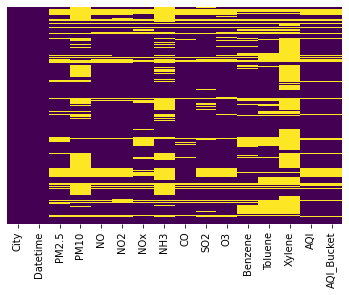

In [16]:
sns.heatmap(air.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
air["AQI_Bucket"].unique()

array([nan, 'Poor', 'Moderate', 'Very Poor', 'Severe', 'Satisfactory',
       'Good'], dtype=object)

In [18]:
air["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [19]:
fill_col=["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","AQI"]

In [20]:
air.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


## Filling Null Values 

In [21]:
for i in fill_col:
    air[i] = air[i].fillna(air[i].median())

In [22]:
air.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [23]:
air.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,46.42,91.5,1.00,40.01,36.37,15.38,1.00,122.07,26.24,0.0,0.0,0.0,116.0,NaN
1,Ahmedabad,2015-01-01 02:00:00,46.42,91.5,0.02,27.75,19.73,15.38,0.02,85.90,26.24,0.0,0.0,0.0,116.0,NaN
2,Ahmedabad,2015-01-01 03:00:00,46.42,91.5,0.08,19.32,11.08,15.38,0.08,52.83,26.24,0.0,0.0,0.0,116.0,NaN
3,Ahmedabad,2015-01-01 04:00:00,46.42,91.5,0.30,16.45,9.20,15.38,0.30,39.53,153.58,0.0,0.0,0.0,116.0,NaN
4,Ahmedabad,2015-01-01 05:00:00,46.42,91.5,0.12,14.90,7.85,15.38,0.12,32.63,26.24,0.0,0.0,0.0,116.0,NaN


In [24]:
air["AQI_Bucket"].unique()

array([nan, 'Poor', 'Moderate', 'Very Poor', 'Severe', 'Satisfactory',
       'Good'], dtype=object)

In [25]:
air["AQI_Bucket"]=air["AQI_Bucket"].fillna("Moderate")

<AxesSubplot:>

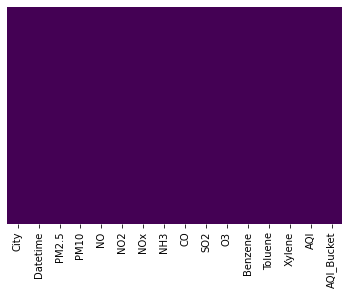

In [26]:
sns.heatmap(air.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
air.value_counts("City")

City
Ahmedabad             48192
Delhi                 48192
Mumbai                48192
Bengaluru             48192
Lucknow               48192
Chennai               48192
Hyderabad             48107
Patna                 44554
Gurugram              40258
Visakhapatnam         35053
Amritsar              29269
Jorapokhar            28025
Jaipur                26705
Thiruvananthapuram    26651
Amaravati             22784
Brajrajnagar          22468
Talcher               22161
Kolkata               19503
Guwahati              12002
Coimbatore             9229
Shillong               7402
Chandigarh             7263
Bhopal                 6903
Kochi                  3854
Ernakulam              3852
Aizawl                 2680
dtype: int64

In [28]:
air.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,46.42,91.5,1.00,40.01,36.37,15.38,1.00,122.07,26.24,0.0,0.0,0.0,116.0,Moderate
1,Ahmedabad,2015-01-01 02:00:00,46.42,91.5,0.02,27.75,19.73,15.38,0.02,85.90,26.24,0.0,0.0,0.0,116.0,Moderate
2,Ahmedabad,2015-01-01 03:00:00,46.42,91.5,0.08,19.32,11.08,15.38,0.08,52.83,26.24,0.0,0.0,0.0,116.0,Moderate
3,Ahmedabad,2015-01-01 04:00:00,46.42,91.5,0.30,16.45,9.20,15.38,0.30,39.53,153.58,0.0,0.0,0.0,116.0,Moderate
4,Ahmedabad,2015-01-01 05:00:00,46.42,91.5,0.12,14.90,7.85,15.38,0.12,32.63,26.24,0.0,0.0,0.0,116.0,Moderate


# Data and information visualization

In [29]:
city_AQI = air[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()

In [39]:
city_AQI

,City,AQI
0,Aizawl,26.0
1,Thiruvananthapuram,70.0
2,Shillong,73.0
3,Coimbatore,79.0
4,Bengaluru,85.0
5,Chandigarh,85.0
6,Amaravati,90.0
7,Ernakulam,100.0
8,Chennai,101.0
9,Kochi,101.0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

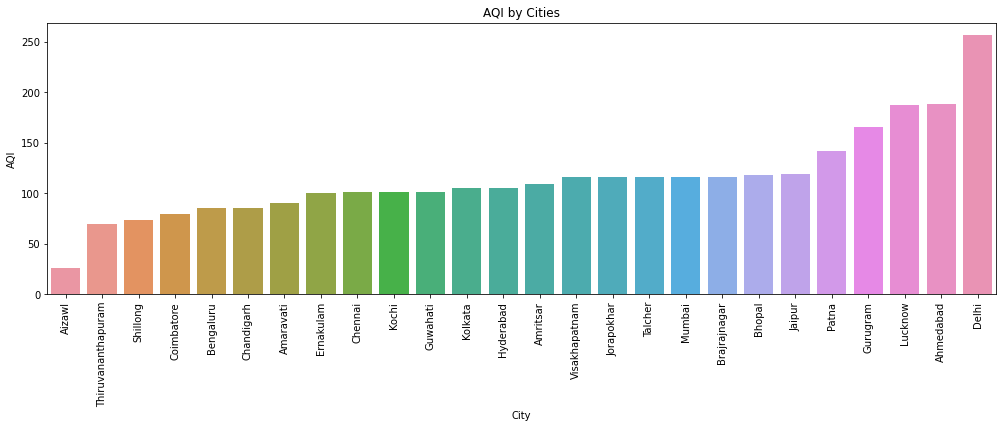

In [31]:
plt.figure(figsize=(17,5))
sns.barplot(x="City",y="AQI",data=city_AQI)
plt.title(label="AQI by Cities")
plt.xticks(rotation=90)
plt.tight_layout

In [32]:
df1=pd.read_csv("Indian_cities.csv")

In [33]:
df1.head()

,City,State,Latitude,Longitude
0,Nanjangud,Karnataka,12.120000,76.680000
1,Chittorgarh,Rajasthan,24.879999,74.629997
2,Ratnagiri,Maharashtra,16.994444,73.300003
3,Goregaon,Maharashtra,19.155001,72.849998
4,Pindwara,Rajasthan,24.794500,73.055000


In [34]:
air2=pd.merge(air, df1, on='City')

In [35]:
air3=pd.merge(city_AQI, df1, on='City')

In [36]:
air2.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,State,Latitude,Longitude
0,Ahmedabad,2015-01-01 01:00:00,46.42,91.5,1.00,40.01,36.37,15.38,1.00,122.07,26.24,0.0,0.0,0.0,116.0,Moderate,Gujarat,23.033863,72.585022
1,Ahmedabad,2015-01-01 02:00:00,46.42,91.5,0.02,27.75,19.73,15.38,0.02,85.90,26.24,0.0,0.0,0.0,116.0,Moderate,Gujarat,23.033863,72.585022
2,Ahmedabad,2015-01-01 03:00:00,46.42,91.5,0.08,19.32,11.08,15.38,0.08,52.83,26.24,0.0,0.0,0.0,116.0,Moderate,Gujarat,23.033863,72.585022
3,Ahmedabad,2015-01-01 04:00:00,46.42,91.5,0.30,16.45,9.20,15.38,0.30,39.53,153.58,0.0,0.0,0.0,116.0,Moderate,Gujarat,23.033863,72.585022
4,Ahmedabad,2015-01-01 05:00:00,46.42,91.5,0.12,14.90,7.85,15.38,0.12,32.63,26.24,0.0,0.0,0.0,116.0,Moderate,Gujarat,23.033863,72.585022


In [40]:
fig = px.scatter_mapbox(air3, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="AQI", 
                        hover_data=["AQI","City"],
                        color="AQI",
                        color_continuous_scale="jet",
                        size="AQI",
                        zoom=3.8, 
                        height=600,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Data Insights we get from this Project

- The air pollution project has identified the level of air pollution in various cities across India.
- Aizawl has the lowest air pollution level with 26.0 followed by Thiruvananthapuram with 70.0.
- Delhi has the highest level of air pollution with 256.0 followed by Ahmedabad with 188.0.
- Cities like Shillong, Coimbatore, Bengaluru, and Chandigarh have moderate levels of air pollution ranging between 73.0 to 85.0.
- The project has identified the air pollution level in 25 cities of India.
- The project provides valuable information to people living in these cities to take necessary precautions and measures to improve the air quality.

### Thank you for scrolling